To investigate:
* How to remove mean.
* Convolution window to isolate blobs.
* Calculate properties and cluster analysis.

Websites:
* [Image manipulation with SciPy and Numpy](https://scipy-lectures.org/advanced/image_processing/#blurring-smoothing)
* [skimage](https://scikit-image.org/)
* [OpenCV](https://docs.opencv.org/4.5.5/)
* [nanonispyfit](https://github.com/jhellerstedt/spm-image-viewer)
* https://pyimagesearch.com/2015/03/23/sliding-windows-for-object-detection-with-python-and-opencv/
* https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_blob.html
* https://learnopencv.com/blob-detection-using-opencv-python-c/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import matplotlib.pyplot as plt


In [6]:
import numpy as np

In [ ]:

# %cd C:\Users\Admin\Desktop\ADS2001\molecules
# %ls

C:\Users\Admin\Desktop\ADS2001\molecules
 Volume in drive C has no label.
 Volume Serial Number is C41A-3959

 Directory of C:\Users\Admin\Desktop\ADS2001\molecules

06/04/2022  08:31    <DIR>          .
24/04/2022  14:40    <DIR>          ..
06/04/2022  08:09         1,048,870 111_test_data.p
06/04/2022  08:09         3,512,004 1705_6.txt
06/04/2022  08:09         9,443,547 180509_18-16-48_SPM001.sxm
06/04/2022  08:09        16,782,073 Ag111_APT_007.sxm
06/04/2022  08:09        16,782,072 Ag111_APT_008.sxm
06/04/2022  08:10        16,782,076 Ag111_APT_009.sxm
06/04/2022  08:10        16,782,077 Ag111_APT_010.sxm
06/04/2022  08:10        10,490,787 Ag111_APT_111.sxm
06/04/2022  08:10         9,468,523 Ag111_APT_CO_044.p
06/04/2022  08:10        16,782,101 Ag111_APT_LL1s_UV9min_009.sxm
09/03/2022  08:37        50,336,746 Helicene_Ag(111)008.sxm
06/04/2022  08:11        16,782,086 Helicene_Ag(111)020.sxm
06/04/2022  08:11        16,782,087 Helicene_Ag(111)021.sxm
              13 File(s)

In [ ]:
# %cd Desktop
# %ls

[WinError 2] The system cannot find the file specified: 'Desktop'
C:\Users\Admin\Desktop\ADS2001\molecules
 Volume in drive C has no label.
 Volume Serial Number is C41A-3959

 Directory of C:\Users\Admin\Desktop\ADS2001\molecules

06/04/2022  08:31    <DIR>          .
24/04/2022  14:40    <DIR>          ..
06/04/2022  08:09         1,048,870 111_test_data.p
06/04/2022  08:09         3,512,004 1705_6.txt
06/04/2022  08:09         9,443,547 180509_18-16-48_SPM001.sxm
06/04/2022  08:09        16,782,073 Ag111_APT_007.sxm
06/04/2022  08:09        16,782,072 Ag111_APT_008.sxm
06/04/2022  08:10        16,782,076 Ag111_APT_009.sxm
06/04/2022  08:10        16,782,077 Ag111_APT_010.sxm
06/04/2022  08:10        10,490,787 Ag111_APT_111.sxm
06/04/2022  08:10         9,468,523 Ag111_APT_CO_044.p
06/04/2022  08:10        16,782,101 Ag111_APT_LL1s_UV9min_009.sxm
09/03/2022  08:37        50,336,746 Helicene_Ag(111)008.sxm
06/04/2022  08:11        16,782,086 Helicene_Ag(111)020.sxm
06/04/2022  08:11 

In [7]:
%cd /content/drive/MyDrive/Colab Notebooks/CountingMolecules
%cd Christian\ Wackerlin

/content/drive/MyDrive/Colab Notebooks/CountingMolecules
/content/drive/MyDrive/Colab Notebooks/CountingMolecules/Christian Wackerlin


In [8]:
im = np.loadtxt('1705_6.txt')

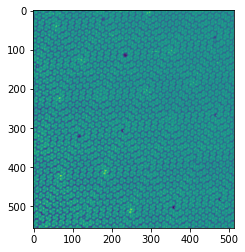

In [ ]:
plt.imshow(im)

In [10]:
!pip install nanonispy
import nanonispy as nap

In [11]:
%cd ../Hellerstedt\ APT

/content/drive/MyDrive/Colab Notebooks/CountingMolecules/Hellerstedt APT


In [12]:
%ls

111_test_data.p    Ag111_APT_111.sxm
Ag111_APT_007.sxm  Ag111_APT_CO_044.p
Ag111_APT_008.sxm  Ag111_APT_LL1s_UV9min_009.sxm
Ag111_APT_009.sxm  Ag111_APT_UV21min_anneal_003.sxm
Ag111_APT_010.sxm  Ag111_APT_UV21min_anneal_40min_018.sxm


In [17]:
import pickle
d = pickle.load(open('111_test_data.p','rb'))
im1 =  d['image']

In [18]:
rescale = d['rescale']

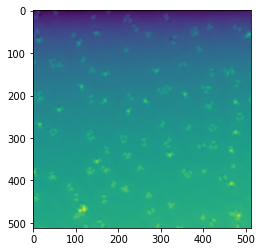

In [19]:
plt.imshow(im1)

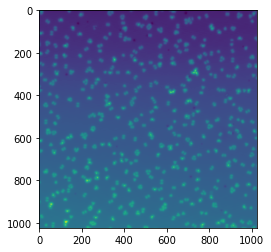

In [20]:
scan = nap.read.Scan('Ag111_APT_007.sxm')
im2 = scan.signals['Z']['forward']
if scan.header['scan_dir'] == 'down':
    im = np.flipud(im2)
im2[np.isnan(im2)] = np.mean(im2[~np.isnan(im2)])
plt.imshow(im2)

In [21]:
im2.shape

(1024, 1024)

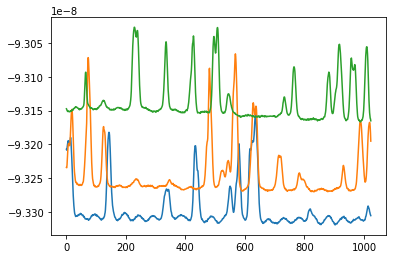

In [22]:
# show how the mean changes over differrent slices
plt.plot(im2[:][0])
plt.plot(im2[:][256])
plt.plot(im2[:][-1])

In [66]:
def image_mean_remove(image):
    '''removes the mean change in the field'''
    imslice = image
    ind1 = np.arange(imslice.shape[0])
    ind2 = np.arange(imslice.shape[1])
    xm = np.mean(imslice,axis=0)
    for ix in ind1:
        imslice[ix,:] = imslice[ix,:]-xm
    ym = np.mean(imslice,axis=1)
    for iy in ind2:
        imslice[:,iy] = imslice[:,iy]-ym
    return imslice


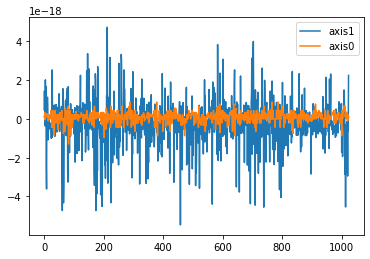

In [68]:
# remove the mean change from the image
imslice = image_mean_remove(im2)

ym = np.mean(imslice,axis=1)
xm = np.mean(imslice,axis=0)
plt.plot(np.arange(imslice.shape[1]),xm,label='axis1')
plt.plot(np.arange(imslice.shape[0]),ym,label='axis0')
plt.legend()

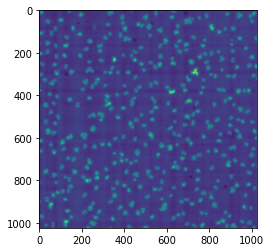

In [69]:
plt.imshow(imslice)

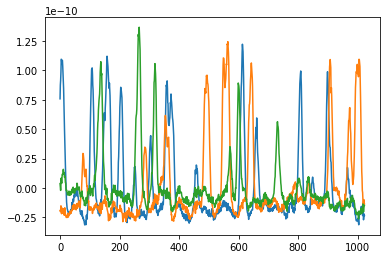

In [70]:
# look to see the variation of the mean in the other direction
plt.plot(im2[:,0])
plt.plot(im2[:,256])
plt.plot(im2[:,-1])

8.48952e-20


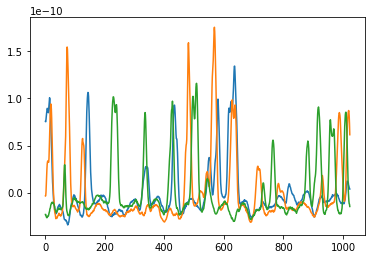

In [71]:
# show that the mean has been removed
plt.plot(imslice[0,:])
plt.plot(imslice[256,:])
plt.plot(imslice[-1,:])
print(imslice.mean())

In [34]:
# use the otsu threshold filter to binarize the image
# the threshold picks an intensity to make as black or white
# similar to choosing the mean
# clear_border cleans up blobs close to the border
from skimage import segmentation
from skimage import filters

mask = imslice > filters.threshold_otsu(imslice)
# mask = imslice > imslice.mean()
clean_border = segmentation.clear_border(mask)

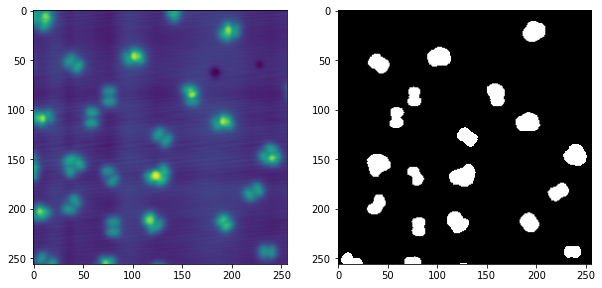

In [35]:
# compare the image with the binary version
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.imshow(imslice[0:256,0:256])
ax2.imshow(clean_border[0:256,0:256], cmap='gray')

0.11198139190673828


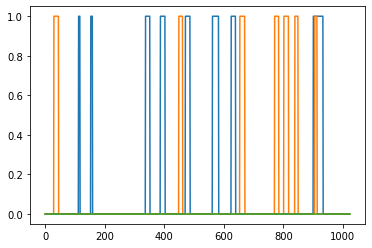

In [36]:
# show slices of binary image
plt.plot(clean_border[:,52])
plt.plot(clean_border[200,:])
plt.plot(clean_border[-1,:])
print(clean_border.mean())

In [47]:
# label all the blobs
from skimage import measure

blobs_labels = measure.label(clean_border, background=0)

In [52]:
print(np.max(np.unique(blobs_labels))+1)

340


/usr/local/lib/python3.7/dist-packages/skimage/color/colorlabel.py:114: UserWarning: Negative intensities in `image` are not supported
  bg_color, image_alpha)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


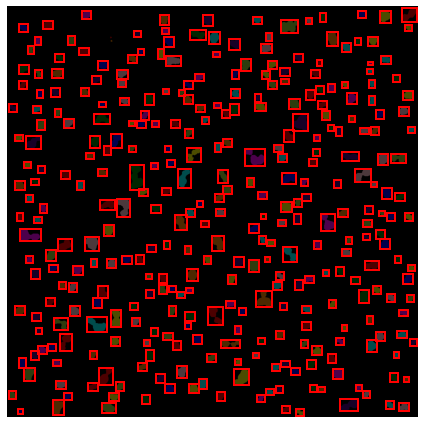

In [41]:
import matplotlib.patches as mpatches

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


# apply threshold
thresh = threshold_otsu(imslice)
bw = closing(imslice > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=imslice, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 50:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

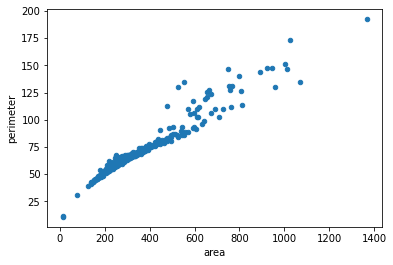

In [42]:
# calculate the area and perimeter of each of the blobs and scatter plot this
import pandas as pd
props = measure.regionprops_table(label_image, properties=('area', 'perimeter'))
improps = pd.DataFrame(props)
improps.plot.scatter(x='area', y='perimeter')

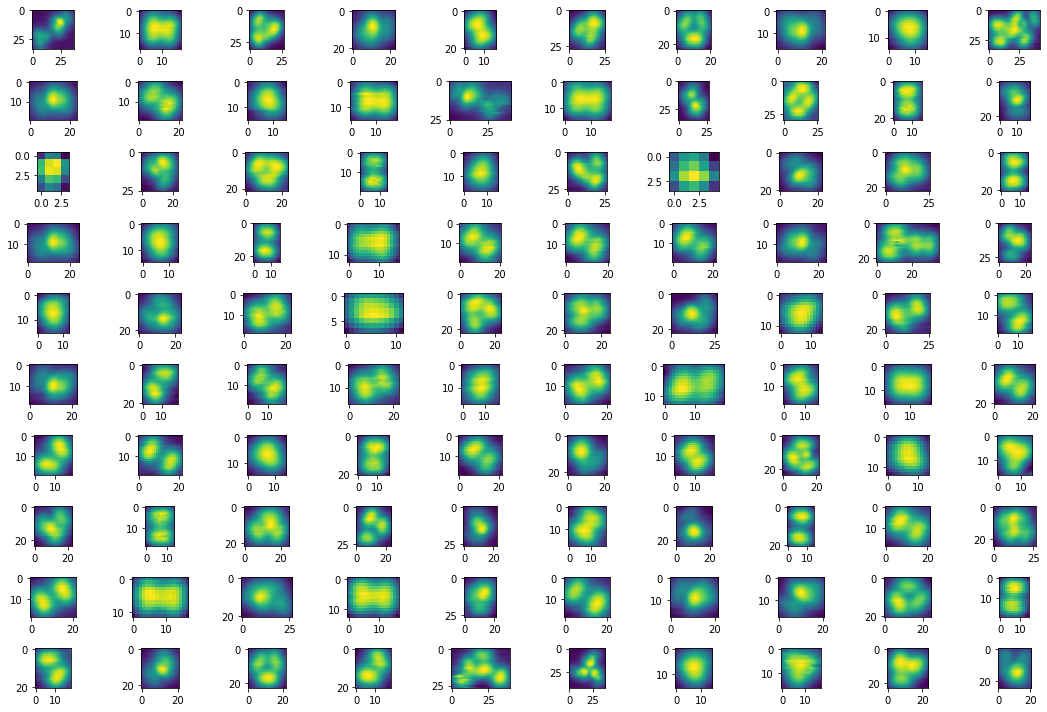

In [43]:
# plot the first 100 blobs
fig, ax = plt.subplots(10, 10, figsize=(15,10))

j = 0
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 1 and j < 100:
        i = j//10 # integer division, rounded down to nearest integer
        k = j%10 # calculate remainder of k//2

        minr, minc, maxr, maxc = region.bbox
        ax[i,k].imshow(imslice[minr:maxr,minc:maxc])
        j = j+1

fig.tight_layout()

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.measure import label, regionprops, regionprops_table
from skimage.filters import threshold_otsu
from scipy.ndimage import median_filter
from matplotlib.patches import Rectangle
from tqdm import tqdm

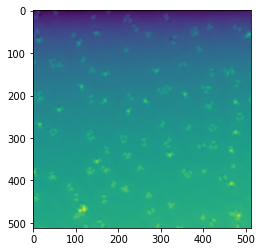

In [55]:
plt.imshow(im1)

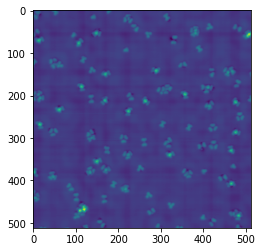

In [72]:
imslice = image_mean_remove(im1)

plt.imshow(imslice)

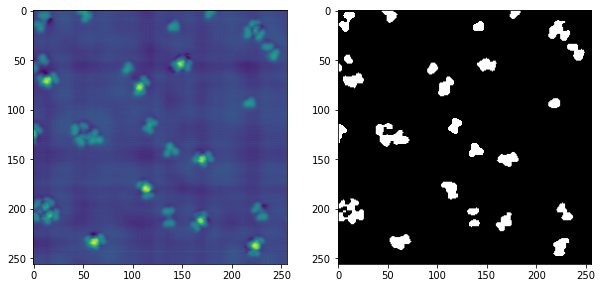

In [73]:
thresh = threshold_otsu(imslice)
bw = closing(imslice > thresh, square(3))

# compare the image with the binary version
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.imshow(imslice[0:256,0:256])
ax2.imshow(bw[0:256,0:256], cmap='gray')

In [74]:
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import erosion, dilation, opening, closing
from skimage.measure import label, regionprops
from skimage.color import label2rgb

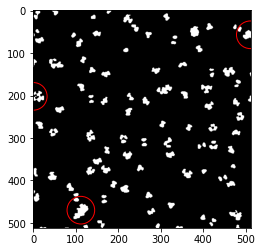

In [75]:
# Using the functions imported above, we can adjust the blob detection using the 
# parameters max_sigma,num_sigma and threshold.
blobs = blob_log(bw, max_sigma=30, min_sigma =23, num_sigma=2, threshold=0.2, 
                 overlap = 0.2)
fig, ax = plt.subplots()
ax.imshow(bw, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', fill=False))
# write on what it identifies....
# blob detection (medium)

In [76]:
def multi_dil(bw,num):
    for i in range(num):
        bw = dilation(bw)
    return im
def multi_ero(bw,num):
    for i in range(num):
        bw = erosion(bw)
    return bw

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


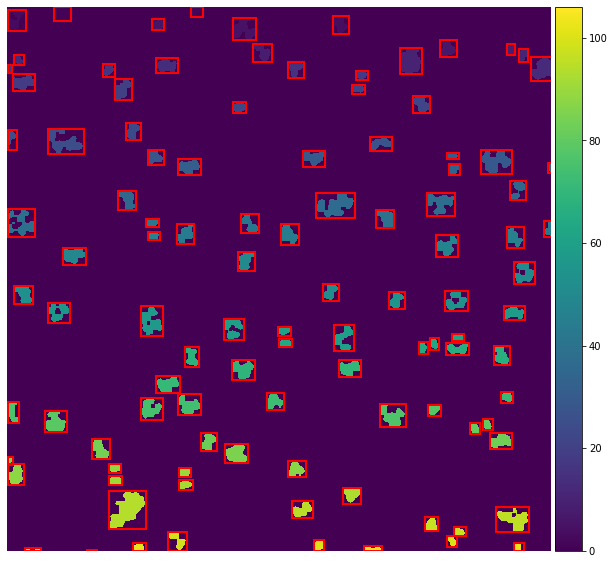

In [83]:
label_im = label(bw)
fig, ax = plt.subplots(figsize=(9, 10))
imshow(label_im)
for i in regionprops(label_im):
    minr, minc, maxr, maxc = i.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    ax.set_axis_off()
    
plt.show()

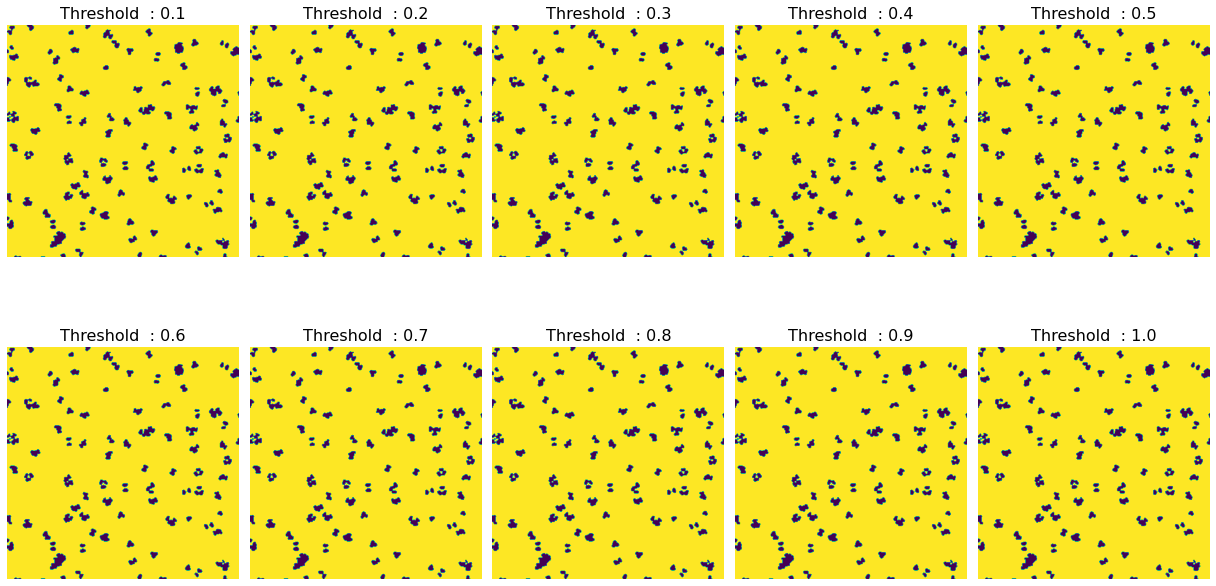

In [85]:
def threshold_checker(image):
    thresholds =  np.arange(0.1,1.1,0.1)
    image_gray = bw
    fig, ax = plt.subplots(2, 5, figsize=(17, 10))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Threshold  : {round(thresholds[n],2)}',      
                       fontsize = 16)
        threshold_tree = image_gray < thresholds[n]
        ax.imshow(threshold_tree);
        ax.axis('off')
    fig.tight_layout()

threshold_checker(im2)

In [87]:
# tree_gray = rgb2gray(tree)
# otsu_thresh = threshold_otsu(tree_gray)
# tree_binary = tree_gray < otsu_thresh
# imshow(tree_binary, cmap = 'gray')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  if __name__ == '__main__':


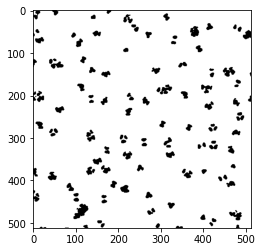

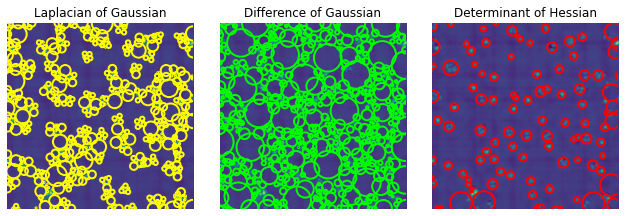

In [91]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image_gray = rgb2gray(im1)
otsu_thresh=threshold_otsu(image_gray)
image_bin=image_gray<otsu_thresh
plt.imshow(image_bin,cmap='gray')

blobs_log = blob_log(image_bin, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_bin, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_bin, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [ ]:
# 